In [1]:
from utils.datasets import WildfireDataset, show_image

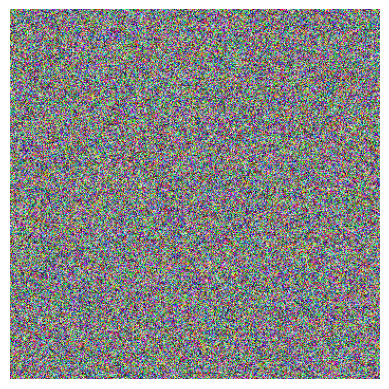

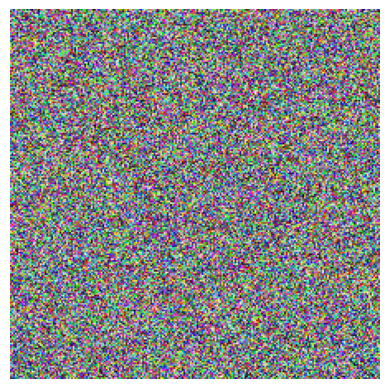

In [2]:
from torchvision import transforms
import torch


x = transforms.CenterCrop(224)

random_img = torch.rand(3, 350, 350)
show_image(random_img)
show_image(x(random_img))

In [3]:
print(random_img.shape)
print(x(random_img).shape)

torch.Size([3, 350, 350])
torch.Size([3, 224, 224])


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train = WildfireDataset("/data/amathur-23/ROB313", split="train", labeled=True)
train_unlabeled = WildfireDataset(
    "/data/amathur-23/ROB313", split="train", labeled=False
)
val = WildfireDataset("/data/amathur-23/ROB313", split="val", labeled=True)
test = WildfireDataset("/data/amathur-23/ROB313", split="test", labeled=True)


print("Train:", len(train))
print("Train unlabeled:", len(train_unlabeled))
print("Val:", len(val))
print("Test:", len(test))

Loading meta file: /data/amathur-23/ROB313/train.csv
Loading meta file: /data/amathur-23/ROB313/train_unlabeled.csv
Loading meta file: /data/amathur-23/ROB313/val.csv
Loading meta file: /data/amathur-23/ROB313/test.csv
Train: 5040
Train unlabeled: 30249
Val: 1260
Test: 6299


In [6]:
sample = train_unlabeled[0]

In [7]:
sample.keys()

dict_keys(['image', 'coords', 'filename'])

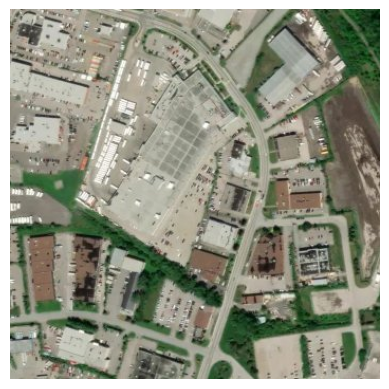

In [8]:
img = sample["image"]
show_image(img)

In [9]:
sample["coords"]

tensor([-75.7346,  45.4642])

In [10]:
train.meta

,filename,coord_x,coord_y,label
0,/data/amathur-23/ROB313//valid/nowildfire/-123...,-123.034615,49.248318,nowildfire
1,/data/amathur-23/ROB313//valid/nowildfire/-79....,-79.475910,43.658522,nowildfire
2,/data/amathur-23/ROB313//valid/nowildfire/-73....,-73.755705,45.562646,nowildfire
3,/data/amathur-23/ROB313//valid/wildfire/-70.64...,-70.648140,50.879200,wildfire
4,/data/amathur-23/ROB313//valid/wildfire/-77.02...,-77.024780,46.277880,wildfire
...,...,...,...,...
5035,/data/amathur-23/ROB313//valid/nowildfire/-73....,-73.906629,45.631967,nowildfire
5036,/data/amathur-23/ROB313//valid/wildfire/-73.73...,-73.731220,47.898080,wildfire
5037,/data/amathur-23/ROB313//valid/wildfire/-70.47...,-70.473850,49.195440,wildfire
5038,/data/amathur-23/ROB313//valid/wildfire/-74.98...,-74.981880,49.830940,wildfire


In [11]:
train.meta["int_label"] = [int(x == "wildfire") for x in train.meta["label"]]
val.meta["int_label"] = [int(x == "wildfire") for x in val.meta["label"]]
test.meta["int_label"] = [int(x == "wildfire") for x in test.meta["label"]]

In [12]:
train.meta.corr(numeric_only=True)

,coord_x,coord_y,int_label
coord_x,1.000000,-0.417330,0.586662
coord_y,-0.417330,1.000000,0.186952
int_label,0.586662,0.186952,1.000000


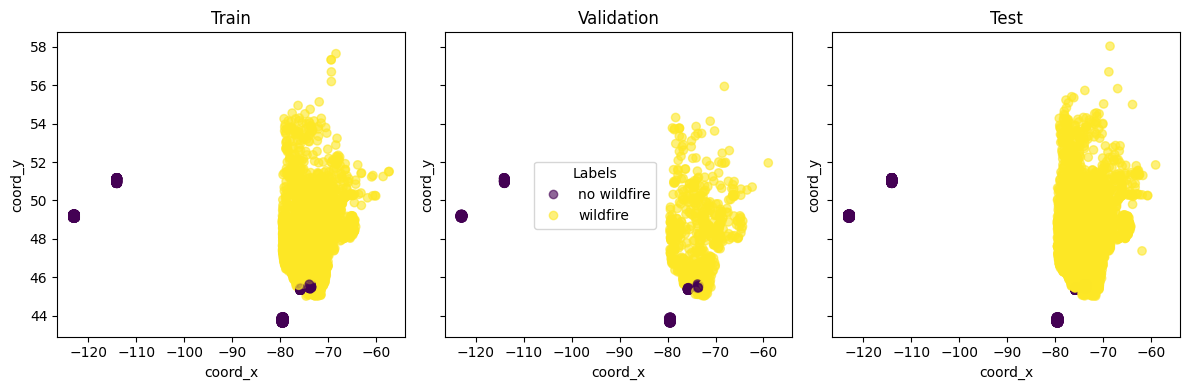

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

datasets = [train, val, test]
titles = ['Train', 'Validation', 'Test']

for ax, dataset, title in zip(axes, datasets, titles):
    scatter = ax.scatter(
        dataset.meta['coord_x'], 
        dataset.meta['coord_y'], 
        c=dataset.meta['int_label'], 
        cmap='viridis', 
        alpha=0.6
    )
    ax.set_title(title)
    ax.set_xlabel('coord_x')
    ax.set_ylabel('coord_y')

handles, labels = scatter.legend_elements()
# print(labels)
labels = ["no wildfire" if label == '$\\mathdefault{0}$' else "wildfire" for label in labels]
fig.legend(handles, labels, title='Labels', loc='center')
plt.tight_layout()
plt.show()

In [25]:
np.unique(test.meta['int_label'], return_counts=True)

(array([0, 1]), array([2820, 3479]))

In [17]:
scatter.legend_elements()

([<matplotlib.lines.Line2D at 0x78d5b802b620>,
 ['$\\mathdefault{0}$', '$\\mathdefault{1}$'])

In [14]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=32, shuffle=True)
val_loader = DataLoader(val, batch_size=32, shuffle=False)
test_loader = DataLoader(test, batch_size=32, shuffle=False)
train_unlabeled_loader = DataLoader(train_unlabeled, batch_size=32, shuffle=True)

In [15]:
# from tqdm import tqdm

# # Initialize lists to store mean and std values for each channel
# mean_r, mean_g, mean_b = [], [], []
# std_r, std_g, std_b = [], [], []

# # Iterate through the dataset
# for sample in tqdm(train_unlabeled):
#     img = sample["image"]
#     mean_r.append(img[0].mean().item())
#     mean_g.append(img[1].mean().item())
#     mean_b.append(img[2].mean().item())
#     std_r.append(img[0].std().item())
#     std_g.append(img[1].std().item())
#     std_b.append(img[2].std().item())

# # Compute the overall mean and std for each channel
# mean_r = np.mean(mean_r)
# mean_g = np.mean(mean_g)
# mean_b = np.mean(mean_b)
# std_r = np.mean(std_r)
# std_g = np.mean(std_g)
# std_b = np.mean(std_b)

# print(f"Mean R: {mean_r}, Mean G: {mean_g}, Mean B: {mean_b}")
# print(f"Std R: {std_r}, Std G: {std_g}, Std B: {std_b}")

In [16]:
# mean_r = np.mean(mean_r)
# mean_g = np.mean(mean_g)
# mean_b = np.mean(mean_b)
# std_r = np.mean(std_r)
# std_g = np.mean(std_g)
# std_b = np.mean(std_b)

# print(f"Mean R: {mean_r}, Mean G: {mean_g}, Mean B: {mean_b}")
# print(f"Std R: {std_r}, Std G: {std_g}, Std B: {std_b}")

In [17]:
# from tqdm import tqdm

# for batch in tqdm(train_loader):
#     continue

# for batch in tqdm(val_loader):
#     continue

# for batch in tqdm(test_loader):
#     continue

# for batch in tqdm(train_unlabeled_loader):
#     continue

In [18]:
from collections import Counter

train_labels_count = Counter(train.meta["label"])
val_labels_count = Counter(val.meta["label"])
test_labels_count = Counter(test.meta["label"])

print("Train labels count:", train_labels_count)
print("Val labels count:", val_labels_count)
print("Test labels count:", test_labels_count)

Train labels count: Counter({'wildfire': 2796, 'nowildfire': 2244})
Val labels count: Counter({'wildfire': 684, 'nowildfire': 576})
Test labels count: Counter({'wildfire': 3479, 'nowildfire': 2820})


In [19]:
from utils.augmentations import ContrastiveTransformations

clr_transforms = ContrastiveTransformations(img_size=350)

clr_set = WildfireDataset(
    "/data/amathur-23/ROB313", split="train", labeled=True, transforms=clr_transforms
)

Loading meta file: /data/amathur-23/ROB313/train.csv


In [20]:
i = 0

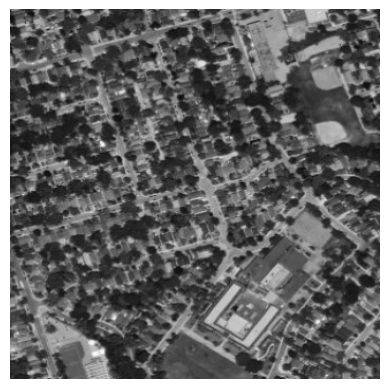

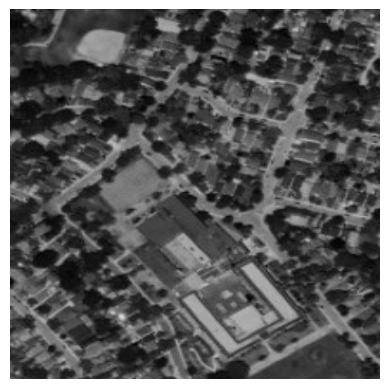

In [21]:
i += 1
sample = clr_set[i]
im1, im2 = sample["image"]

show_image(im1)
show_image(im2)

In [22]:
import torch.nn as nn

encoder = nn.Sequential(
    nn.Conv2d(3, 32, 4, stride=2, padding=1),  # 350 -> 175
    nn.ReLU(),
    nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 175 -> 86
    nn.ReLU(),
    nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 86 -> 43
    nn.ReLU(),
    nn.Conv2d(128, 128, 4, stride=2, padding=1),  # 43 -> 21
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(128 * 21 * 21, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)

encoder.eval()

encoder(im1.unsqueeze(0)).shape

torch.Size([1, 1])

In [23]:
128 * 21 * 21

56448

In [25]:
conv1 = nn.Conv2d(3, 32, 4, stride=2, padding=1)  # 350 -> 175
conv2 = nn.Conv2d(32, 64, 4, stride=2, padding=1)  # 175 -> 86
conv3 = nn.Conv2d(64, 128, 4, stride=2, padding=1)  # 86 -> 43
conv4 = nn.Conv2d(128, 128, 4, stride=2, padding=1)  # 43 -> 21
relu = nn.ReLU()

fc = nn.Sequential(
    nn.Flatten(),
    nn.Linear(128 * 21 * 21, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)

x = im1.unsqueeze(0)


x1 = relu(conv1(x))
x2 = relu(conv2(x1))
x3 = relu(conv3(x2))
x4 = relu(conv4(x3))

print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
x = x4 + x3  # Skip connection


x.shape

torch.Size([1, 32, 175, 175])
torch.Size([1, 64, 87, 87])
torch.Size([1, 128, 43, 43])
torch.Size([1, 128, 21, 21])


RuntimeError: The size of tensor a (21) must match the size of tensor b (43) at non-singleton dimension 3

In [30]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

In [31]:
import os 

os.environ["TORCH_HOME"] = "/data/amathur-23/ROB313"

backbones = [
    "resnet18",
    "resnet34",
    "resnet50",
    "resnet101",
]

from models import (
    JustCoords,
    ResNetEncoder,
    ResNetBinaryClassifier,
    ResNetCoordsBinaryClassifier,
    BinaryClassifierWithPretrainedEncoder,
    ConvVAE,
    ClassifierFeatures,
    CNNBinaryClassifier,
    CNNBinaryClassifierWithCoords,
)

# Count Params in each model

models = {
    "just_coords": JustCoords(),
    "cnn_binary_classifier": CNNBinaryClassifier(),
    "cnn_binary_classifier_with_coords": CNNBinaryClassifierWithCoords(),
}

for backbone in backbones:
    models[f"{backbone}_binary_classifier"] = ResNetBinaryClassifier(backbone)
    models[f"{backbone}_coords_binary_classifier"] = ResNetCoordsBinaryClassifier(
        backbone
    )
    models[f"{backbone}_pretrained_encoder"] = ResNetEncoder(out_features=128, backbone=backbone)
    models[f"{backbone}_classifier_on_pretrained"] = BinaryClassifierWithPretrainedEncoder(encoder=models[f"{backbone}_pretrained_encoder"])

for name, model in models.items():
    print(name, count_parameters(model))
    



Using resnet18 with 512 FC input features
Using resnet18 with 512 FC input features
Using ResNet50 with 512 FC input features
Using resnet34 with 512 FC input features
Using resnet34 with 512 FC input features
Using ResNet50 with 512 FC input features
Using resnet50 with 2048 FC input features
Using resnet50 with 2048 FC input features
Using ResNet50 with 2048 FC input features
Using resnet101 with 2048 FC input features
Using resnet101 with 2048 FC input features
Using ResNet50 with 2048 FC input features
just_coords 4417
cnn_binary_classifier 14912353
cnn_binary_classifier_with_coords 14912865
resnet18_binary_classifier 11440705
resnet18_coords_binary_classifier 11441729
resnet18_pretrained_encoder 11505856
resnet18_classifier_on_pretrained 11522753
resnet34_binary_classifier 21548865
resnet34_coords_binary_classifier 21549889
resnet34_pretrained_encoder 21614016
resnet34_classifier_on_pretrained 21630913
resnet50_binary_classifier 27710529
resnet50_coords_binary_classifier 24559681
